In [1]:
from coreset_streaming import Coreset_Streaming
import numpy as np
import random 
import matplotlib.pyplot as plt
import helper_functions as hf

In [ ]:
a = Coreset_Streaming(10000)
b = Coreset_Streaming(10000)

In [ ]:
def add_n_points_to_cs(cs, n, r):
    """ Args:
            cs: coreset
            n: number of points to add
            r: range from 0 to r (inclusive) to sample from
    """
    points = []
    for i in range(n):
        point = [random.randint(0, r), random.randint(0,r)]
        cs.add_point(point)

In [ ]:
n = 100
r = 50
add_n_points_to_cs(a, n, r)
add_n_points_to_cs(b, n, r)

In [ ]:
a.build_coreset()

In [ ]:
b.build_coreset()

In [ ]:
a.coreset

In [ ]:
len(a.coreset)

In [ ]:
b.coreset

In [ ]:
len(b.coreset)

In [ ]:
a.can_union(b)

In [ ]:
a.union(b)

In [ ]:
a.coreset

In [ ]:
len(a.coreset)

In [17]:
def generate_uniform_test_data():
    x_arr = []
    for i in range(10000):
        x_val, y_val = np.random.randint(0,100), np.random.randint(0,100)
        x_arr.append([x_val, y_val])
    return x_arr

def get_arrs_for_plotting_stream(stream):
    og_xs = []
    og_ys = []
    for (x, y) in stream:
        og_xs.append(x)
        og_ys.append(y)
    return (og_xs, og_ys)

def get_arrs_for_plotting_coreset(coreset):
    cs_xs = []
    cs_ys = []
    weights = []
    for ((x, y), weight) in coreset:
        cs_xs.append(x)
        cs_ys.append(y)
        weights.append(weight)
        
    return (cs_xs, cs_ys, weights)

def run_stream(stream, data_size=10000, chunk_size=1000):
    """ Returns the coreset.
    """
    a = Coreset_Streaming(data_size)
    b = Coreset_Streaming(data_size)

    # first add first chunk to a
    for i in range(chunk_size):
        a.add_point(stream[i])

    counter = 1
    for i in range(chunk_size, len(stream)):
        b.add_point(stream[i])

        if counter % chunk_size == 0:
            if a.can_union(b):
                a.union(b)
                b = Coreset_Streaming(data_size)
            else:
                while not a.can_union(b):
                    # will the resolution of b ever be more than that of a?
                    if a.resolution > b.resolution:
                        b.double_resolution()
                    else:
                        a.double_resolution()
        counter += 1        

    return a

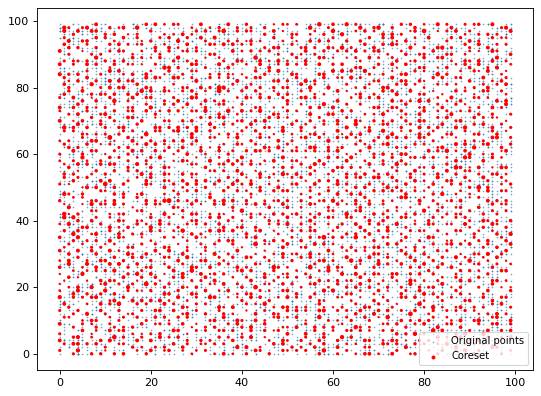

In [18]:
uniform_stream = generate_uniform_test_data()
coreset = run_stream(uniform_stream)
(og_xs, og_ys) = get_arrs_for_plotting_stream(uniform_stream)
(cs_xs, cs_ys, weights) =  get_arrs_for_plotting_coreset(coreset.coreset)
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(og_xs, og_ys, s=0.1, label="Original points")
plt.scatter(cs_xs, cs_ys, s=weights, c="red", label="Coreset")
plt.legend(loc="lower right", fontsize=9)

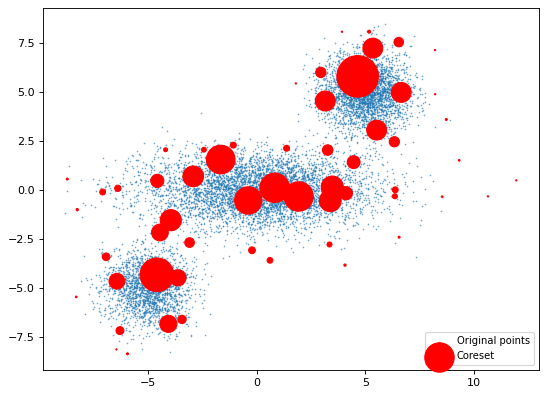

In [23]:
# generate 3 gaussian clusters
rng = np.random.default_rng(12345)
n = 10000
k = 5
means1 = [[5, 5], [-5, -5], [0, 0]]
covs1 = [np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]]), np.array([[7, 0], [0, 1]])]
gaussian_stream = hf.simulate_gaussian_clusters(rng, [3000, 2000, 5000], 3, means1, covs1)

coreset = run_stream(gaussian_stream)
(og_xs, og_ys) = get_arrs_for_plotting_stream(gaussian_stream)
(cs_xs, cs_ys, weights) = get_arrs_for_plotting_coreset(coreset.coreset)
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(og_xs, og_ys, s=0.1, label="Original points")
plt.scatter(cs_xs, cs_ys, s=weights, c="red", label="Coreset")
plt.legend(loc="lower right", fontsize=9)

weighted_kmeans() converged
weighted_kmeans() converged


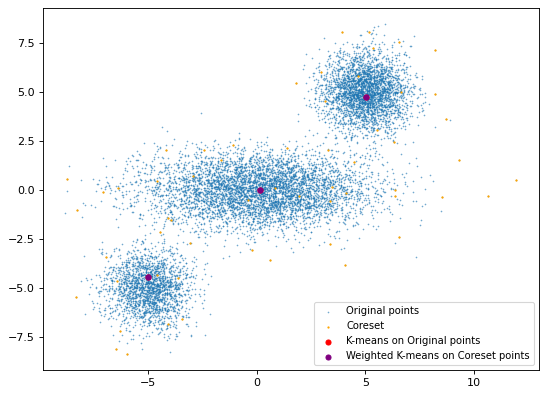

In [36]:
cs_points = []
weights = []
for (point, weight) in coreset.coreset:
    cs_points.append(point)
    weights.append(weight)
k = 3
kmeans_centers = hf.weighted_kmeans(gaussian_stream, k, rng)
kmeans_coreset = hf.weighted_kmeans(np.array(cs_points), k, rng, w = weights)
(kxs, kys) = get_arrs_for_plotting_stream(kmeans_centers)
(ckxs, ckys) = get_arrs_for_plotting_stream(kmeans_centers)
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(og_xs, og_ys, s=0.1, label="Original points")
plt.scatter(cs_xs, cs_ys, s=1, c="orange", label="Coreset")
plt.scatter(kxs, kys, s=20, c="red", label="K-means on Original points")
plt.scatter(ckxs, ckys, s=20, c="purple", label="Weighted K-means on Coreset points")
plt.legend(loc="lower right", fontsize=9)